In [1]:
import pylab as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = 15, 10

In [2]:
import csv
import glob
from collections import defaultdict
import pandas as pd
import numpy as np

In [3]:
#From http://rosettacode.org/wiki/Set_consolidation#Python
def consolidate(sets):
    setlist = [set(s) for s in sets if s] # convert to mutable_set
    for i, s1 in enumerate(setlist):
        if s1:
            for s2 in setlist[i+1:]:
                intersection = s1.intersection(s2)
                if intersection:
                    s2.update(s1)
                    s1.clear()
                    s1 = s2
    return [frozenset(s) for s in setlist if s]

In [4]:

def load_paraphrase_groups():
    for filename in glob.glob("opinosis_split/*"):
        table = pd.read_csv(filename, delimiter='\t', header=None,  encoding = "ISO-8859-1")
        
        for col_num in range(1,table.shape[1]): #Skip column zero as that contains unsorted entrys
            pf_group = table.iloc[:,col_num].dropna().tolist()
            if len(pf_group)>0:
                yield pf_group


In [34]:
def postprocess(sentence):
    import re
    def replace_broken_hypen(first_half, second_half, sentence):
        pattern = r"(?<=%s),\s?(?=%s)" % (first_half, second_half)
        return re.sub(pattern, "-",sentence,flags=re.IGNORECASE)
    
    sentence=sentence.strip()
    sentence=re.sub(r"^\d\s","",sentence) #remove starting numbers
    sentence=re.sub(r"^[\.\,\-\!\?\;\:]+\s?","",sentence) #remove starting punctuation

    sentence=re.sub(r"(,\s?)+",", ",sentence) #remove repeated commas
    sentence =sentence.replace("&quot", "\"")
    sentence =sentence.replace("&amp", "\"")
    
    sentence =re.sub("(?<=e),\s?(?=ink)", "-",sentence, flags=re.IGNORECASE) #fix broken "e, ink" to "e-ink"
    sentence =replace_broken_hypen("e", "ink", sentence)
    sentence =replace_broken_hypen("on", "line", sentence)
    return sentence

In [35]:
pf_groups = list(load_paraphrase_groups())
pf_groups = [frozenset(map(postprocess, group)) for group in pf_groups]
pf_groups = consolidate(pf_groups)

In [36]:
pf_groups = [group for group in pf_groups if len(group)>3]

In [37]:
pf_group_sizes = pd.Series(list(map(len,pf_groups)))
pf_group_sizes.describe()

count    53.000000
mean      7.358491
std       5.424639
min       4.000000
25%       4.000000
50%       5.000000
75%       8.000000
max      27.000000
dtype: float64

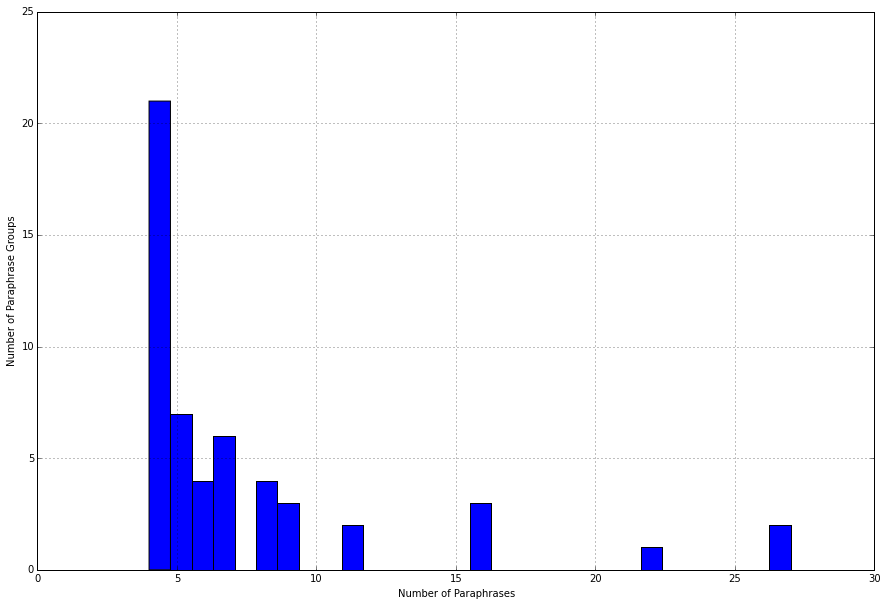

In [38]:
pl.xlabel("Number of Paraphrases")
pl.ylabel("Number of Paraphrase Groups")
plt = pf_group_sizes.hist(bins=30, ax=pl.gca())

'E, ink hardly strains your eyes .'

In [26]:
pf_groups

[frozenset({'The rooms are clean and reasonably sized .',
            'The rooms we had were a good size and clean .',
            'The rooms were spacious and clean .'}),
 frozenset({'The rooms are comfortable, clean and nicely furnished .',
            'The rooms were clean, nicely decorated, and comfortable .',
            'The rooms were nice   clean .',
            'The rooms were nice, comfortable, and clean .',
            'The rooms were pleasant, clean and did not disappoint .',
            'The rooms were very nice and clean .',
            'The rooms were very nice, clean and comfortable .'}),
 frozenset({'The rooms are clean and tidy .',
            'The rooms were celan and well kept .',
            'The rooms were clean and well, cared for .'}),
 frozenset({'The rooms are a bit small, but not uncomfortably so .'}),
 frozenset({'Our rooms were very small but beautifully decorated .',
            'The rooms are small but attractive .',
            'the rooms are small but v